In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# tf.keras.datasets.mnist.load_data() will return tuples, the tupples structure would look like this
# ((training_images, training_labels), (validation_images, validation_labels))

(training_images, training_labels),(validation_images, validation_labels) = tf.keras.datasets.mnist.load_data()

In [3]:
# Check total files
print(f"training files contain {training_images.shape} images, and {training_labels.shape} labels")
print(f"training files contain {validation_images.shape} images, and {validation_labels.shape} labels")

training files contain (60000, 28, 28) images, and (60000,) labels
training files contain (10000, 28, 28) images, and (10000,) labels


In [4]:
# cehck the first umage from the training and validation and check the imaga shape
# the images shahpe will be (28,28), we need to expand the dimension to (28,28,1)

# for each pixel

print(f"training images shape : {training_images[0].shape}")
print(f"training images shape : {validation_images[0].shape}")

def reshape_and_normalize(images):
    images = images.reshape(*images.shape, 1)/255
    return images

training_images = reshape_and_normalize(training_images)
validation_images = reshape_and_normalize(validation_images)


training images shape : (28, 28)
training images shape : (28, 28)


In [5]:
training_images2 = reshape_and_normalize(training_images)

In [6]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Check accuracy
        if(logs.get('val_accuracy') > 0.99):
            print("\nValidation accuracy is higher than 0.99 so stopping training!")
            self.model.stop_training = True


In [7]:

def convolutional_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

          # Add the same layers as before
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')

    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [8]:
model = convolutional_model()

model_params = model.count_params()

assert model_params < 1000000, (
    f'Your model has {model_params:,} params. For successful grading, please keep it '
    f'under 1,000,000 by reducing the number of units in your Conv2D and/or Dense layers.'
)

callbacks = myCallback()

history = model.fit(training_images, training_labels,
                    epochs=10,
                    validation_data=(validation_images, validation_labels),
                    callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 80s 41ms/step - loss: 0.1348 - accuracy: 0.9591 - val_loss: 0.0469 - val_accuracy: 0.9841
Epoch 2/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0363 - val_accuracy: 0.9885
Epoch 3/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0315 - accuracy: 0.9897 - val_loss: 0.0307 - val_accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0278 - val_accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9945
Validation accuracy is higher than 0.99 so stopping training!
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0258 - val_accuracy: 0.9925


In [9]:
prediction_result = model.predict(validation_images)

313/313 [==============================] - 3s 9ms/step


In [10]:
prediction_result = np.argmax(prediction_result, axis=1)

In [11]:
diff_indices = np.where(prediction_result != validation_labels)[0]
print(f"{diff_indices.shape[0]} images is misspredicted out of {validation_images.shape[0]}")

75 images is misspredicted out of 10000


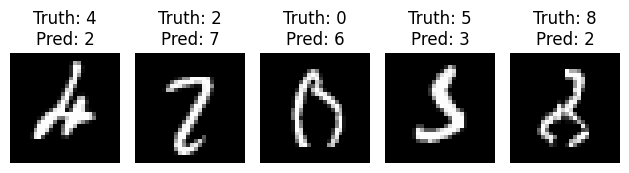

In [12]:
# take the first 5 of miss predicted images, and plot the images
misspredicted_images = diff_indices[:5]

fig, axes = plt.subplots(nrows=1, ncols=misspredicted_images.shape[0])
for i, ax in enumerate(axes):
    ax.imshow(validation_images[misspredicted_images[i]], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Truth: {validation_labels[misspredicted_images[i]]}\nPred: {prediction_result[misspredicted_images[i]]}")
plt.tight_layout()
plt.show()